In [2]:
# Import necessary libraries
import os
import ast
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from dotenv import load_dotenv
from tqdm import trange
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Import libraries for working with language models and Google Gemini
from langchain_openai import ChatOpenAI, OpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold

# Install the google-generativeai package (uncomment the line below to run the installation)
!pip install -U -q google-generativeai

# Set up the environment for plotting
%matplotlib inline

# Load environment variables
load_dotenv()


True

In [43]:
import ast
datafile_path = '../data/clustering.csv'
df = pd.read_csv(datafile_path)
df['embeddings'] = df['embeddings'].apply(ast.literal_eval)
df.drop(['publication_date', 'created_date','updated_date'],axis=1, inplace=True)
df.head(30)

,id,Text,Title,embeddings
0,nos7tzp7jprxlqxe,GENEVA – The remains of a climber discovered i...,Remains found in Swiss Alps are those of Briti...,"[0.063923, 0.065677, -0.001089, 0.065425, -0.0..."
1,zvv4ue0w64vfqoz1,Ms Greta Thunburg became a household name when...,Involve youth in shaping ethical use of AI,"[0.063668, 0.098002, -0.022514, -0.033031, -0...."
2,aph1tgua3xxoq2sg,NEW YORK - Defending women's champion Iga...,"Swiatek, Djokovic headline third round action ...","[-0.019315, 0.066645, 0.009547, 0.029555, -0.0..."
3,qk577vhp2gehn54u,NEW YORK - Defending women's champion Iga...,"Swiatek, Djokovic headline third round action ...","[-0.019315, 0.066645, 0.009547, 0.029555, -0.0..."
4,jhjmh8gyw75djp4t,GENEVA – The remains of a climber discovered i...,Remains found in Swiss Alps are those of Briti...,"[0.063923, 0.065677, -0.001089, 0.065425, -0.0..."
5,rlh53czyst054zfn,JAKARTA – Hopes of a return to democracy in ju...,‘Systematic repression’ crushing Myanmar’s dem...,"[0.067328, -0.004407, 0.010127, -0.004268, -0...."
6,aksixz7uun2gkpss,JERUSALEM - Israel's shekel dropped to it...,Israel's shekel falls as judicial showdown looms,"[-0.043186, 0.076352, -0.015492, -0.02859, -0...."
7,kvj7tdp68jonrzc2,JERUSALEM - Israel's shekel dropped to it...,Israel's shekel falls as judicial showdown looms,"[-0.043186, 0.076352, -0.015492, -0.02859, -0...."
8,slue2wdvlok4sfy6,TOKYO - A man accused of throwing a pipe bomb ...,Man charged for throwing explosive at Japan PM...,"[0.027659, 0.046639, 0.028653, 0.021851, 0.028..."
9,pyl0q77hsesqauod,TOKYO - A man accused of throwing a pipe bomb ...,Man charged for throwing explosive at Japan PM...,"[0.027659, 0.046639, 0.028653, 0.021851, 0.028..."


In [44]:
import ast
datafile_path = '../data/clustering.csv'
df = pd.read_csv(datafile_path)
df['embeddings'] = df['embeddings'].apply(ast.literal_eval)
df.drop(['publication_date', 'created_date','updated_date'],axis=1, inplace=True)
df.head(30)

,id,Text,Title,embeddings
0,nos7tzp7jprxlqxe,GENEVA – The remains of a climber discovered i...,Remains found in Swiss Alps are those of Briti...,"[0.063923, 0.065677, -0.001089, 0.065425, -0.0..."
1,zvv4ue0w64vfqoz1,Ms Greta Thunburg became a household name when...,Involve youth in shaping ethical use of AI,"[0.063668, 0.098002, -0.022514, -0.033031, -0...."
2,aph1tgua3xxoq2sg,NEW YORK - Defending women's champion Iga...,"Swiatek, Djokovic headline third round action ...","[-0.019315, 0.066645, 0.009547, 0.029555, -0.0..."
3,qk577vhp2gehn54u,NEW YORK - Defending women's champion Iga...,"Swiatek, Djokovic headline third round action ...","[-0.019315, 0.066645, 0.009547, 0.029555, -0.0..."
4,jhjmh8gyw75djp4t,GENEVA – The remains of a climber discovered i...,Remains found in Swiss Alps are those of Briti...,"[0.063923, 0.065677, -0.001089, 0.065425, -0.0..."
5,rlh53czyst054zfn,JAKARTA – Hopes of a return to democracy in ju...,‘Systematic repression’ crushing Myanmar’s dem...,"[0.067328, -0.004407, 0.010127, -0.004268, -0...."
6,aksixz7uun2gkpss,JERUSALEM - Israel's shekel dropped to it...,Israel's shekel falls as judicial showdown looms,"[-0.043186, 0.076352, -0.015492, -0.02859, -0...."
7,kvj7tdp68jonrzc2,JERUSALEM - Israel's shekel dropped to it...,Israel's shekel falls as judicial showdown looms,"[-0.043186, 0.076352, -0.015492, -0.02859, -0...."
8,slue2wdvlok4sfy6,TOKYO - A man accused of throwing a pipe bomb ...,Man charged for throwing explosive at Japan PM...,"[0.027659, 0.046639, 0.028653, 0.021851, 0.028..."
9,pyl0q77hsesqauod,TOKYO - A man accused of throwing a pipe bomb ...,Man charged for throwing explosive at Japan PM...,"[0.027659, 0.046639, 0.028653, 0.021851, 0.028..."


In [45]:
initial_len = len(df)
print(f'Size before dropping: {initial_len}' )
df = df.drop_duplicates(subset='Text', keep='first')
after_len = len(df)
print(f'Size after dropping: {after_len}' )

Size before dropping: 15009
Size after dropping: 2019


In [46]:
#Convert this to a matrix
matrix = np.array(df['embeddings'].tolist())
matrix.shape

(2019, 768)

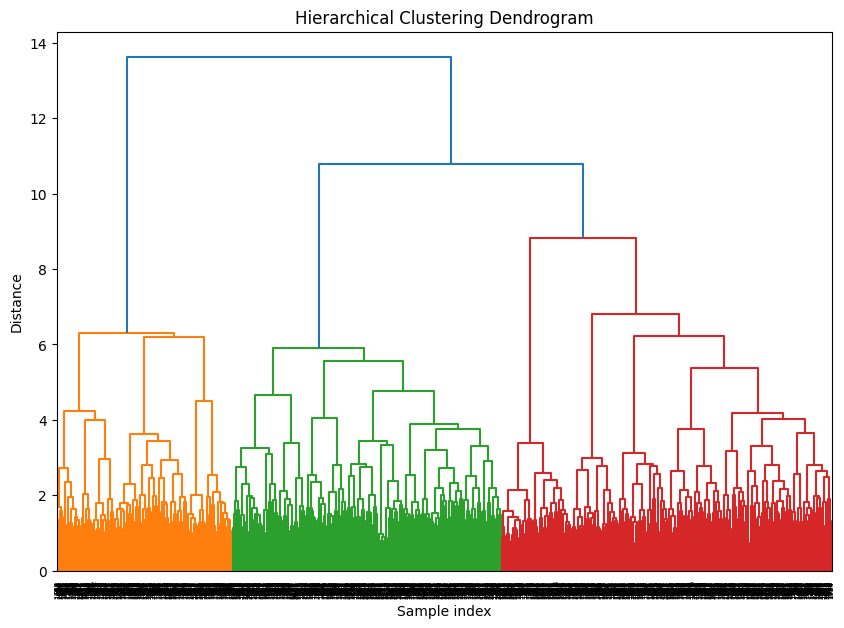

In [47]:
Z = linkage(matrix, method='ward')

# Optional: Plot the dendrogram to visualize clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

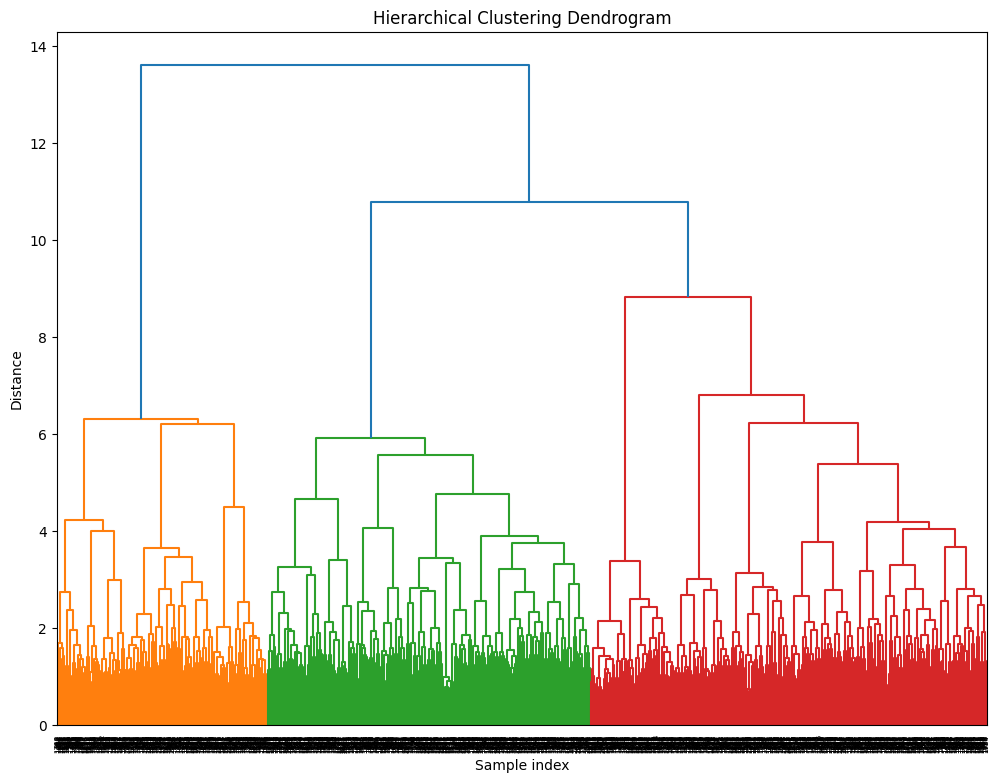

In [48]:
plt.figure(figsize=(12, 9))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

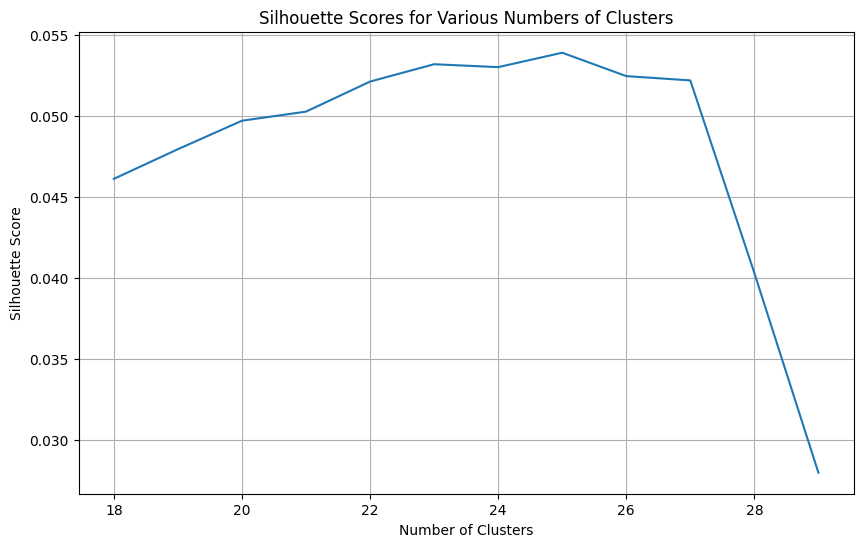

Best number of clusters by silhouette score: 25


In [49]:
range_n_clusters = range(18, 30)  

best_silhouette = -1
best_n_clusters = 0
scores = []

for n_clusters in range_n_clusters:
    # Extract clusters
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(matrix, labels)  
    scores.append(silhouette_avg)
      
    # Store the best score and corresponding number of clusters
    if silhouette_avg > best_silhouette and n_clusters >20:
        best_silhouette = silhouette_avg
        best_n_clusters = n_clusters

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, scores)
plt.title("Silhouette Scores for Various Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


print("Best number of clusters by silhouette score:", best_n_clusters)

/tmp/ipykernel_1092076/3433689378.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 25)  # Colormap with 25 distinct colors


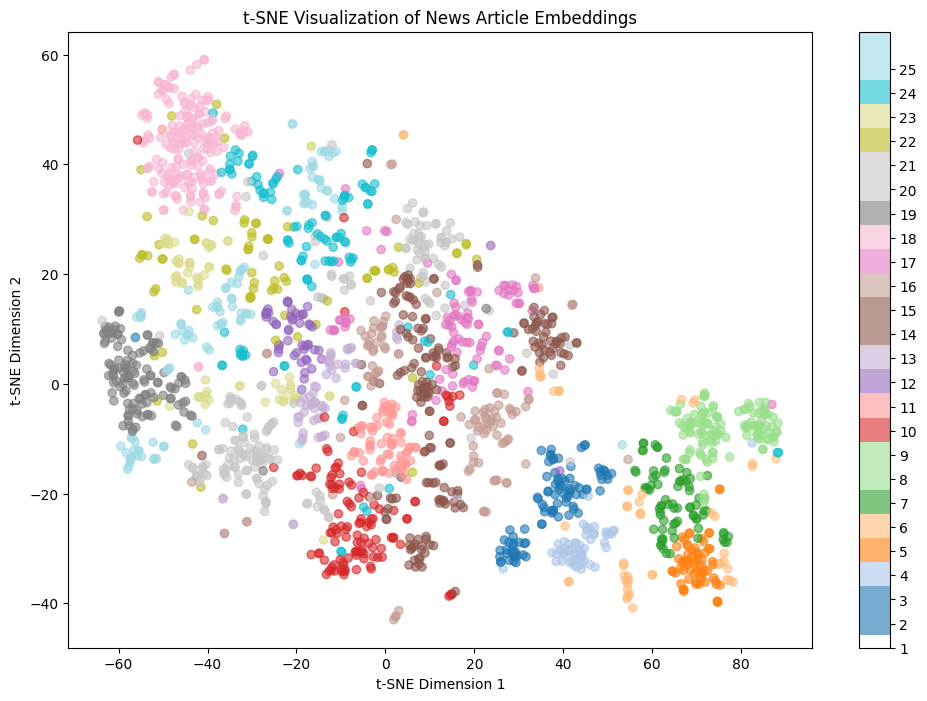

In [50]:
from scipy.cluster.hierarchy import fcluster

# Assuming 'Z' is your previously computed linkage matrix for hierarchical clustering
# Extract clusters
labels = fcluster(Z, 25, criterion='maxclust')

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, learning_rate=200)

# Apply t-SNE transformation
tsne_results = tsne.fit_transform(matrix)

# Create a scatter plot
plt.figure(figsize=(12, 8))
cmap = plt.cm.get_cmap('tab20', 25)  # Colormap with 25 distinct colors
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap=cmap, alpha=0.6)

# Add a color bar
colorbar = plt.colorbar(scatter)
tick_locs = (np.arange(25) + 0.5)*(25-1)/25
colorbar.set_ticks(tick_locs)
colorbar.set_ticklabels(np.arange(1, 26))

# Set title and labels
plt.title('t-SNE Visualization of News Article Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [51]:
len(labels)

2019

In [52]:
df["Cluster"] = labels
df.head()

,id,Text,Title,embeddings,Cluster
0,nos7tzp7jprxlqxe,GENEVA – The remains of a climber discovered i...,Remains found in Swiss Alps are those of Briti...,"[0.063923, 0.065677, -0.001089, 0.065425, -0.0...",21
1,zvv4ue0w64vfqoz1,Ms Greta Thunburg became a household name when...,Involve youth in shaping ethical use of AI,"[0.063668, 0.098002, -0.022514, -0.033031, -0....",10
2,aph1tgua3xxoq2sg,NEW YORK - Defending women's champion Iga...,"Swiatek, Djokovic headline third round action ...","[-0.019315, 0.066645, 0.009547, 0.029555, -0.0...",3
5,rlh53czyst054zfn,JAKARTA – Hopes of a return to democracy in ju...,‘Systematic repression’ crushing Myanmar’s dem...,"[0.067328, -0.004407, 0.010127, -0.004268, -0....",19
6,aksixz7uun2gkpss,JERUSALEM - Israel's shekel dropped to it...,Israel's shekel falls as judicial showdown looms,"[-0.043186, 0.076352, -0.015492, -0.02859, -0....",17


In [53]:
df["combined"] = (
    "Title: " + df.Title.str.strip() + "; Content: " + df.Text.str.strip())

In [68]:
cluster_range = range(1,n_clusters+1)
NUM_TO_EXPLORE = 9

for i in cluster_range:
    sample_cluster_rows = df[df.Cluster == i].sample(NUM_TO_EXPLORE, random_state=42)
    print(f"Cluster {i}")
    for j in range(NUM_TO_EXPLORE):
        print(sample_cluster_rows.Title.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:150].values[j])

    print("-" * 100)

Cluster 1
Alpine skiing-Swiss Gut-Behrami clinches narrow win in giant slalom World Cup opener:   SOELDEN, Austria  -     Switzerland's Lara Gut-Behrami narrowly won the women's giant slalom, edging out Italy's Federica Brignone, while the favourit
Singapore back to winning ways with 58-36 victory over Cook Islands in netball Nations Cup:   SINGAPORE – After a narrow defeat by Papua New Guinea on the opening day of the Mirxes Nations Cup, Singapore were determined to return to winning way
Jackson plans to take aim at Flo-Jo's 200m world record in Brussels:   Jamaican sprinter Shericka Jackson will take aim at the women's 200 metres world record, one of the oldest athletics records on the books, on Friday a
Chinese tennis star Wu Yibing motivated to inspire others:   HANGZHOU – On a sweltering Monday afternoon, all eyes are on Wu Yibing at the Hangzhou Olympic Sports Centre.The partisan crowd is vocal in their supp
Thousands turn out to get Asian Games torch relay under way in Hangzhou:

In [93]:
# Create a dataframe with this output
titles = []
texts = []
clusters = []
ids = []

for i in cluster_range:
    sample_cluster_rows = df[df.Cluster == i].sample(NUM_TO_EXPLORE, random_state=42)
    for j in range(NUM_TO_EXPLORE):
        titles.append(sample_cluster_rows.Title.values[j])
        texts.append(sample_cluster_rows.Text.values[j])
        clusters.append(i)
        ids.append(sample_cluster_rows.id[j])
        
df_clusters = pd.DataFrame({'id': ids, 'Title':titles, 'Text': texts, 'Cluster Number':clusters})    
df_clusters.head(20)

,Title,Text,Cluster Number
0,Alpine skiing-Swiss Gut-Behrami clinches narro...,"SOELDEN, Austria - Switzerland's Lara Gut...",1
1,Singapore back to winning ways with 58-36 vict...,SINGAPORE – After a narrow defeat by Papua New...,1
2,Jackson plans to take aim at Flo-Jo's 200m wor...,Jamaican sprinter Shericka Jackson will take a...,1
3,Chinese tennis star Wu Yibing motivated to ins...,"HANGZHOU – On a sweltering Monday afternoon, a...",1
4,Thousands turn out to get Asian Games torch re...,HANGZHOU – The torch relay for China’s Covid-d...,1
5,Singapore’s artistic swimmers eye historic Asi...,SINGAPORE – A new scoring system could see Sin...,1
6,Forum: Cubs’ Lion City Cup performance shows m...,The recent Lion City Cup final between the Sin...,1
7,ST Full-time Report: Shanti Pereira ready to c...,Welcome to the latest edition of ST Full-time ...,1
8,Olympic medalist sues US bobsled team doctor f...,"Aja Evans, a 2014 Olympic bobsled bronze medal...",1
9,Monza ready to get to work as contract talks r...,MONZA - Monza’s “Temple of Speed” was missing ...,2


In [70]:
load_dotenv()
GEMINI_KEY = os.environ.get('GEMINI_KEY')
genai.configure(api_key=GEMINI_KEY)

In [ ]:
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

In [86]:
llm = genai.GenerativeModel('gemini-1.0-pro')

template = '''
            Write a concise summary of the following news article and return your response which covers the key points and events described in the article.\
            The generated summary should not include contractions.\
            TEXT: {text}\
            SUMMARY
            '''

prompt = PromptTemplate(
        input_variables=["text"],
        template=template,
    )

combined_articles = list(df_clusters.values)

summaries = []


def fetch_summary(article):
    article = combined_articles[i]
    final_prompt  = prompt.format(text=article)
    summary = llm.generate_content(final_prompt,
                                   safety_settings={
                                    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
                                    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
                                    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE, 
                                    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE
                                    }
    )
    time.sleep(1)
    try:
        return summary.text
    except ValueError:
        return summary.prompt_feedback

def process_articles(df, max_workers=10):
    results = {}
    batch_size = 10
    cooldown_period = 10  

    articles = df['combined'].tolist()
    ids = df['id'].tolist()
    article_id_pairs = list(zip(articles, ids))

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        for i in range(0, len(article_id_pairs), batch_size):
            current_batch = article_id_pairs[i:i+batch_size]
            print(f"Starting batch processing for articles {i+1} to {min(i+batch_size, len(article_id_pairs))}")
            futures = {executor.submit(fetch_summary, pair): pair for pair in current_batch}

            processed_count = i
            for future in as_completed(futures):
                article_id, summary = future.result()
                results[article_id] = summary
                processed_count += 1
                print(f"Processed {processed_count}")

            if processed_count >= len(article_id_pairs):
                return results

            print(f"All tasks in batch {i//batch_size + 1} completed, cooling down for {cooldown_period} seconds...")
            time.sleep(cooldown_period)
    return results

summaries = process_articles(df)

100%|██████████| 54/54 [02:51<00:00,  3.18s/it]


In [ ]:
df_clusters["Summary_text"] = pd.DataFrame(summaries)
df_clusters["Combined"] = "Title: " + df_clusters.Title.str.strip() + "; Summary: " + df_clusters.Summary_text.str.strip()
template = '''

Task Description: Analyze the provided summaries and titles from a single cluster of articles. 
Your task is to generate a concise theme or label that best captures the commonality across these articles. 
The theme should be broad yet descriptive, following the format shown in the examples below.

Examples:
Combined Title and Summaries: "Hurricane Eta causes widespread destruction across Central America; Governments struggle to provide aid amid pandemic; Environmentalists highlight increased hurricane activity due to climate change."
Cluster Label: Crises and Disasters
Combined Title and Summaries: "Record-breaking temperatures reported globally; Scientists link extreme weather to climate change; Policy makers discuss carbon neutral targets at international summit."
Cluster Label:Environmental Challenges and Climate Action
Your Input:

Combined Title and Summaries:
{text}
Cluster Label:
'''

prompt = PromptTemplate(
    input_variables=["text"],
    template=template)

common_themes = []
for i in trange(n_clusters):
    cluster_i_combined = df_clusters[df_clusters['Cluster Number'] == i]
    combined_title_summary = '\n'.join(list(cluster_i_combined.Combined.values))
    final_prompt  = prompt.format(text=combined_title_summary)
    common_theme = llm.generate_content(final_prompt)
    common_themes.append(common_theme.text)

In [87]:
summaries

["In the season-opening Giant Slalom World Cup, Switzerland's Lara Gut-Behrami triumphed by a narrow margin over Italy's Federica Brignone. Despite a mediocre first run, Gut-Behrami's exceptional second run propelled her to victory. Favorite Mikaela Shiffrin of the US finished in sixth place. Petra Vlhova of Slovakia secured third position overall.",
 "Singapore defeated the Cook Islands 58-36 in the Nations Cup netball match. Despite an initial tie, Singapore dominated throughout the game, leading 20-13 in the first quarter and extending their advantage to 32-19 by halftime. Singapore maintained their dominance in the second half, widening the gap to 47-26 after three quarters. Goal shooter Amandeep Kaur Chahal's 91% shot conversion rate played a significant role in Singapore's victory. The Cook Islands, a mix of experienced and developing players, acknowledged Singapore's exploitation of their unforced errors and poor decision-making. Singapore coach Annette Bishop highlighted the im